### KNN

In [9]:
import numpy as np
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# metricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, auc, confusion_matrix

# Para plotar a curva Roc
import scikitplot as skplt
import matplotlib.pyplot as plt

### lendo base

In [2]:
X = pd.read_csv("./data/preprocessamento/X_normalized.csv", index_col=0)
y = pd.read_csv("./data/preprocessamento/y.csv", header=None, index_col=0)

In [7]:
# Divindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X.head()

In [ ]:
y.head(10)

In [3]:
neighbors = [3, 5, 10]
weights = ['uniform', 'distance']

for n in neighbors:
    for w in weights:
        # Criando KNN
        clf  = KNeighborsClassifier(n_neighbors=n, weights=w)

        # CV 5
        cv_scores = cross_val_score(clf, X, y[1], cv=5)
        print("Numero de vizinhos: ", n)
        print("Peso: ", w)
        print(cv_scores)

Numero de vizinhos:  3
Peso:  uniform
[0.66851151 0.6748228  0.66537192 0.66019229 0.66135768]
Numero de vizinhos:  3
Peso:  distance
[0.66831731 0.6749199  0.66721694 0.6608721  0.66252306]
Numero de vizinhos:  5
Peso:  uniform
[0.68501796 0.69113506 0.6821713  0.67757599 0.67942119]
Numero de vizinhos:  5
Peso:  distance
[0.68501796 0.69074667 0.68275393 0.6769933  0.68175197]
Numero de vizinhos:  10
Peso:  uniform
[0.69822313 0.70249539 0.69508642 0.69845586 0.69505681]
Numero de vizinhos:  10
Peso:  distance
[0.69744635 0.705117   0.69401826 0.69661066 0.69670778]


In [4]:
clf  = KNeighborsClassifier(n_neighbors=25, weights='distance')

# CV 5
cv_scores = cross_val_score(clf, X, y[1], cv=5)
print(cv_scores)

[0.71230217 0.71657442 0.71004078 0.70942993 0.71205205]


In [5]:
clf  = KNeighborsClassifier(n_neighbors=25, weights='uniform')

# CV 5
cv_scores = cross_val_score(clf, X, y[1], cv=5)
print(cv_scores)

[0.71230217 0.7173512  0.71091474 0.71010974 0.71146936]


### Curva Roc

/home/demenezes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Acuracia:  0.714277306967985
Matriz de confusão: 
[[6286 2332]
 [2523 5851]]


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


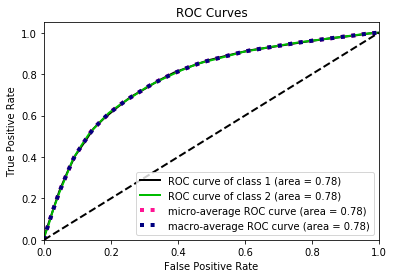

In [10]:
clf  = KNeighborsClassifier(n_neighbors=25, weights='uniform')

clf.fit(X_train, y_train)

# Acuracia na base de teste
y_pred = clf.predict(X_test)
y_prob =  clf.predict_proba(X_test)

print("Acuracia: ", accuracy_score(y_test, y_pred))
print("Matriz de confusão: ")
print(confusion_matrix(y_test, y_pred))

# Curva Roc
skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()